# Исследование объявлений о продаже квартир

## Ⅰ. Изучение данных

### Откроем файл с данными и изучим общую информацию. 

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# прочитаем csv-файл
try:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    print('Ошибка чтения данных')

In [3]:
#  выведем первые 20 строк датафрейма
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# выведем основную информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

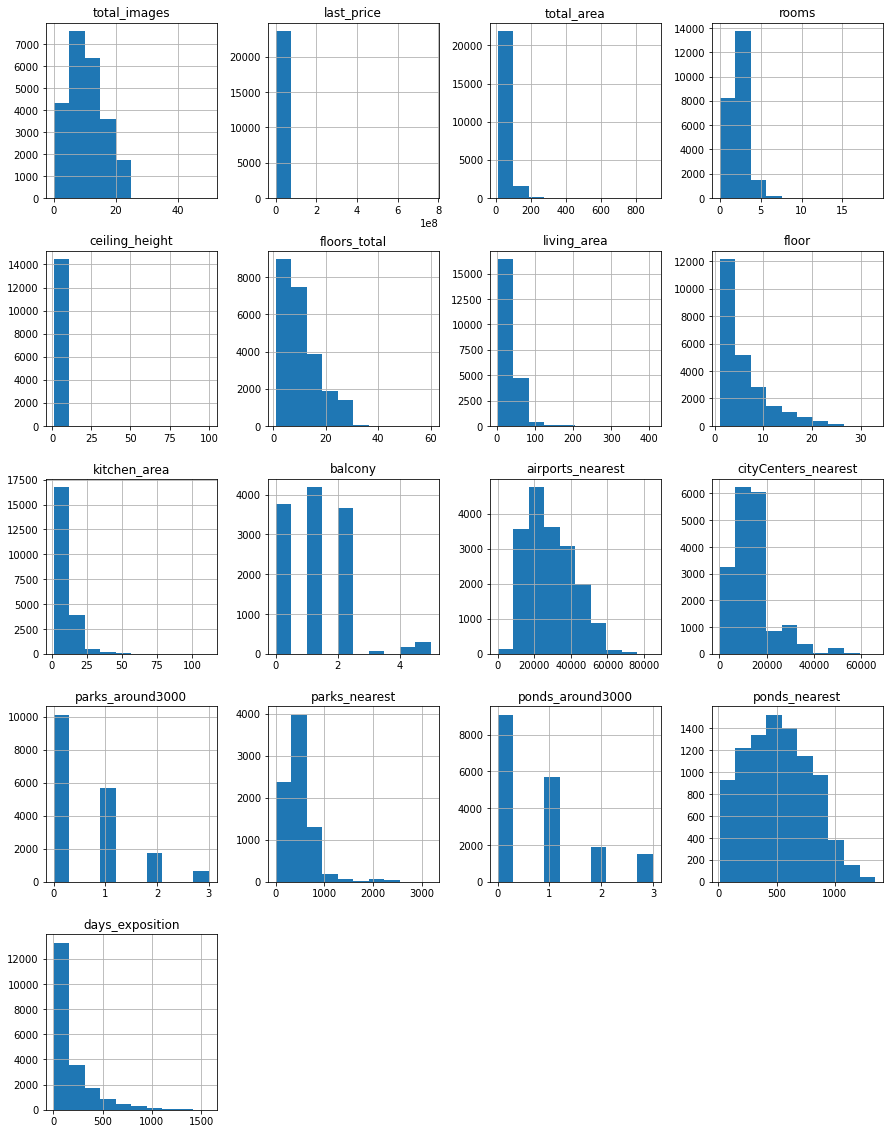

In [5]:
# построим гистограмму для всех числовых столбцов таблицы на одном графике
data.hist(figsize=(15, 20));

**Вывод**  
> Всего в данных 23699 строк и 22 колонки, числовой тип из которых имеют 17. При первом взгляде мы видим пропущенные значения, несоответствие некоторых параметров своему типу. Название столбца 'cityCenters_nearest' не сооответствует 'змеиному регистру' принятому в Python. Значения столбца 'first_day_exposition' требуют форматирования.

## Ⅱ. Предобработка данных

#### Посмотрим на объём пропущенных значений по каждому из столбцов

In [6]:
# выведем пропущенные значения для каждого столбца
data.isna().sum().sort_values(ascending = False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Посмотрим на доли пропущенных данных в столбцах

In [7]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = False, fontsize = 16)
        )    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')
    plt.title('Пропущенные значения, %' + "\n", fontsize=22, color='SteelBlue')
    plt.xlabel('Процент пропусков', fontsize=22)
    plt.ylabel('Столбцы с пропусками')
    plt.xlim(0, 100)
    plt.show

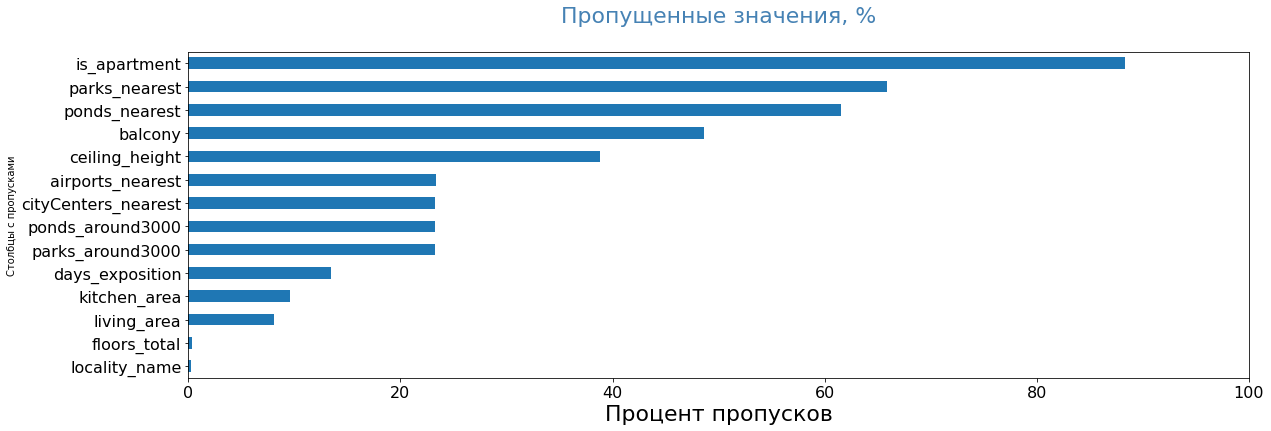

In [8]:
pass_value_barh(data)

Самая большая доля пропусков в: `is_apartment`, `parks_nearest`, `ponds_nearest`

Переименуем столбец `cityCenters_nearest`, чтобы название соответствовало "змеиному регистру"

In [9]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

#### Изучим пропущенные данные, заполним пропуски и приведём тип данных к подходящему типу

Заменим пропущенные значения в `is_apartment` на False. Это будет говорить, что помещение не относится к апартаментам. Поменяем тип данных на булевый, т.к. значения столбца предполагают только два варианта: True и False

In [10]:
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool')

В столбце `balcony` почти 50% пропущенных данных. Пропущенные значения могут свидетельствовать об отсутствии балкона в помещении, поэтому для анализа целесообразно  заменить пропуски на `0`. Изменим тип данных в столбце balcony на целочисленный, т.к. количество балконов не может быть дробным

In [11]:
data['balcony']= data['balcony'].fillna(0).astype('int')

Заменим пустые значения в `floors_total` на медианное. Если этаж квартиры больше медианы, то заменим пустое значение на этаж квартиры.

In [12]:
floors_median = data['floors_total'].median()

In [13]:
data['floors_total'] = data['floors_total'].fillna(value=0)

In [14]:
data['floors_total'] = data['floors_total'].fillna(value=0)
data.loc[(data['floors_total'] == 0) & (data['floor']<=floors_median), 'floors_total']=floors_median
data.loc[data['floors_total'] == 0, 'floors_total'] =data.loc[data['floors_total'] == 0, 'floor']


In [15]:
data['floors_total'].isna().sum()

0

Количество этажей в здании - целое число, поэтому заменим тип данных float на целочисленный

In [16]:
data['floors_total'] = data['floors_total'].astype('int')

In [17]:
# ситуации когда этаж квартиры больше количества этажей в здании нет
data.query('floors_total < floor')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Столбец `first_day_exposition` содержит даты, но имеет формат *object* и Pandas принимает их за строки. Преобразуем данные столбца в формат `datetime`

In [18]:
# преобразуем столбец first_day_exposition в формат datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], 
                                              format='%Y-%m-%dT%H:%M:%S')

Выявим аномально низкие цены объктов

In [19]:
data.query('last_price<400000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


Удалим объект

In [20]:
data = data.query('last_price>100000')
data = data.reset_index(drop=True)

Посмотрим сколько существует значений когда площадь кухни и жилая площадь неизвестны

In [21]:
data.query('living_area.isna() and kitchen_area.isna()')['kitchen_area'].isnull().count()

1464

Этих объектов много их удаление может привести к потере полезной информации. Оставим их

Изучиим объекты на с жилой площадью менее 10 кв м.

In [22]:
len(data.query('living_area < 10'))

25

Их немного, но пока оставим

Т.к. жилая площадь `living_area` является частью общей площади, то можно заменить пропущенные значения величиной, рассчитанной как отношение жилой площади к общей площади. Эту величину мы найдём как отношение медианы всех жилых площадей к медиане всех общих площадей.

In [23]:
# Найдем долю жилой площади в общей площади
frac_living = data['living_area'].median()/data['total_area'].median()-0.1

Заменим пропущенные значения жилой площади значением, которое рассчитывается как произведение найденной выше доли жилой площади в общей площади объекта на общую площадь объекта.

In [24]:
# Заменим пропущенные значения жилой площади
data.loc[data['living_area'].isna(), 'living_area'] = data['total_area']*frac_living
data['living_area'] = data['living_area'].round(2)

Заменим пропущенные значения в `kitchen_area` на величину рассчитанную как оставшаяся часть от разницы между общей площадью и жилой площадью

In [25]:
# Найдём долю площади кухни
diff_kitchen = data['total_area'].median() - data['living_area'].median()
frac_kitchen = data['kitchen_area'].median() / diff_kitchen

In [26]:
# Заменим пропущенные значения площади кухни
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = diff_kitchen*frac_kitchen
data['kitchen_area'] = data['kitchen_area'].round(2)

Посмотрим, есть ли в столбце `total_area` значения, которые превышают сумму значений жилой площади и площади кухни плюс 10% площади, которая не относится к жилой.

In [27]:
len(data.query('total_area < (living_area + kitchen_area + total_area*0.1)'))

847

Исправим эти значения на значения, рассчитаные по формуле living_area + kitchen_area + total_area*0,1

In [28]:
mask = data['total_area'] < (data['living_area'] + data['kitchen_area'] + data['total_area'] * 0.1)

In [29]:
data.loc[mask, 'total_area'] = data['living_area'] + data['kitchen_area'] + data['total_area'] * 0.1

In [30]:
data.query('total_area <= (living_area + kitchen_area)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Посмотрим на потолки выше 9 метров

In [31]:
data.query('ceiling_height > 9')['ceiling_height'].count()

25

Видимо, это ошибка в позиции запятой, изменим значения

In [32]:
data.loc[data['ceiling_height'] > 9, 'ceiling_height'] = data.query('ceiling_height > 9')['ceiling_height']/10

In [33]:
#изменим оставшуюся высоту в 10 м на медиану высоты потолков всех объектов
data.loc[data['ceiling_height'] == 10, 'ceiling_height'] = data['ceiling_height'].median()

Заменим здания у которых нулевые этажи на значения этажей, на которых расплогаются квартиры

In [34]:
data.loc[data['floors_total'] == 0, 'floors_total'] =data.loc[data['floors_total'] == 0, 'floor']

Пропуски в столбцах `parks_around3000` и `ponds_around3000` заполним нулями. Это будет говорить нам, что ближайших парков и водоёмов нет. Изменим тип данных столбцов на целочисленный

In [35]:
# заполним нулями пропущенные значения в 'parks_around3000'
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')

# заполним нулями пропущенные значения в 'ponds_around3000'
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')

Заменим пропущенные значения названий населённых пунктов на `unknown`

In [36]:
data['locality_name'] = data['locality_name'].fillna('unknown')

#### Рассмотрим уникальные значения в столбце с названиями населённых пунктов и устраним неявные дубликаты

In [37]:
data['locality_name'].sort_values().unique()

array(['unknown', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'город

В ходе изучения уникальных значений в столбце `locality_name` были обнаружены неявные дубликаты и произведена их замена


In [38]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской поселок','поселок городского типа', 'коттеджный поселок', 'поселок станции'], 'поселок', regex=True)
    .replace(['поселок Мурино'], 'Мурино')
    .replace(['деревня Кудрово'], 'Кудрово')
    .replace(['поселок Любань'], 'Любань')
    .replace(['село Никольское'], 'Никольское')
)

#### check name

In [39]:
# check
data.locality_name.nunique()

317

**Дубликаты строк не обнаружены**

In [40]:
data.duplicated().sum()

0

In [41]:
data.duplicated(subset=['floor', 'floors_total','rooms', 'total_area', 'city_centers_nearest', 'locality_name']).value_counts()

False    23497
True       201
dtype: int64

обнаружены дубликаты, пока оставим

**Вывод**  
> Мы изучили данные. Больше всего пропусков обнаружено в столбцах is_apartment, parks_nearest и
ponds_nearest. Чтобы анализ и расчёты были точными изменили тип данных на более подходяший. Там, где это представлялось возможным и целесообразным заменили пропущенные значения на их медиану для того, чтобы исключить влияние аномальных значений. Для белевых данных - на нуль. Выявили и исправили неявные дубликаты в названиях населённых пунктов. Обнаружены дубликаты по подмножеству столбцов. Пропуски в исходных данных могут быть как следствием человеческого фактора, так иметь и технический характер.

>**К человеческим факторам могут относиться следующие:**
> - небрежность и невнимательность при заполнении полей;
> - человек может не осознавать важность данных или не видит в этом какой-то выгоды;
> - человек не знает как правильно заполнять поля;
> - неправильное пользование системой;
> - нежелание раскрывать личные данные.

>**Технические причины могут быть следующие:**
> - проблемы с оборудованием;
> - неправильное хранение данных;
> - проблемы с программным обеспечением;
> - технические проблемы при вводе информации;
> - проблемы с сетью;
> - фильтры конфиденциальных данных.

### Посчитаем и добавим в таблицу новые столбцы

- Добавим столбец `square_price`, показывающий цену одного квадратного метра помещения. Округлим значения до двух знаков после запятой.

In [42]:
data['square_price'] = (data['last_price']/data['total_area']).round(2)

- Добавим столбец `weekday` показывающий номер дня недели публикации объявления (0 - понедельник и т.д.)

In [43]:
data['weekday'] = data['first_day_exposition'].dt.dayofweek

- Добавим столбец `month_pubplication` - месяц публикации объявления

In [44]:
data['month_pubplication'] = data['first_day_exposition'].dt.month

- Добавим столбец `year_pubplication` - год публикации объявления

In [45]:
data['year_pubplication'] = data['first_day_exposition'].dt.year

- Добавим столбец `floor_type` - тип этажа квартиры (значения — 'первый', 'последний', 'другой')

In [46]:
def floor_type_func(row):
    if row['floor'] == 1:
        floor_type = 'первый'
    elif row['floor'] == row['floors_total']:
        floor_type = 'последний'
    else:
        floor_type = 'другой'
    return floor_type


data['floor_type'] = data.apply(floor_type_func, axis=1)

- Добавим столбец `citycenter_dist` - расстояние до центра города в километрах

In [47]:
data['citycenter_dist'] = (data['city_centers_nearest']/1000).round()

**Вывод**  
> Добавили в таблицу новые столбцы со следующими параметрами:
> - цена одного квадратного метр
> - день недели публикации объявления
> - месяц публикации объявления
> - год публикации объявления
> - тип этажа квартиры
> - расстояние до центра города в километрах

## Ⅲ. Анализ данных

Среди колонок 'last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms' встречаются аномально высокие и аномально низкие значения. В дальнейшем проведём с ними анализ.

In [48]:
# check
 
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,698.00","23,698.00","14,503.00","20,517.00","23,698.00","23,698.00","23,698.00","23,698.00","23,698.00"
min,0.00,14.40,1.00,1.00,"430,000.00",2.00,1.30,1.00,1.00
max,19.00,900.00,8.30,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00


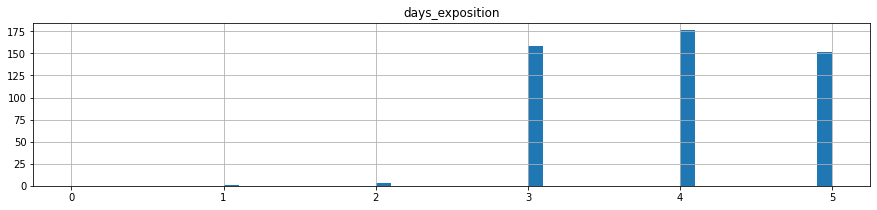

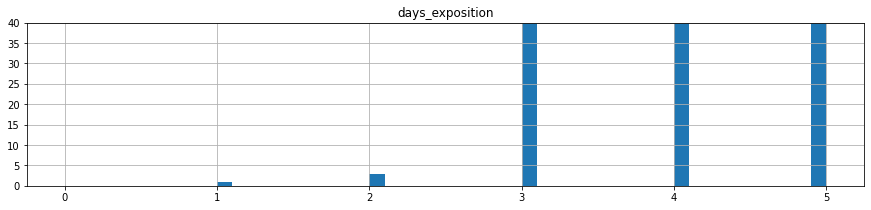

In [49]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

#### Изучим параметры и построим для них гистограммы

**Анализ количества дней объявления, `'days_exposition'`**

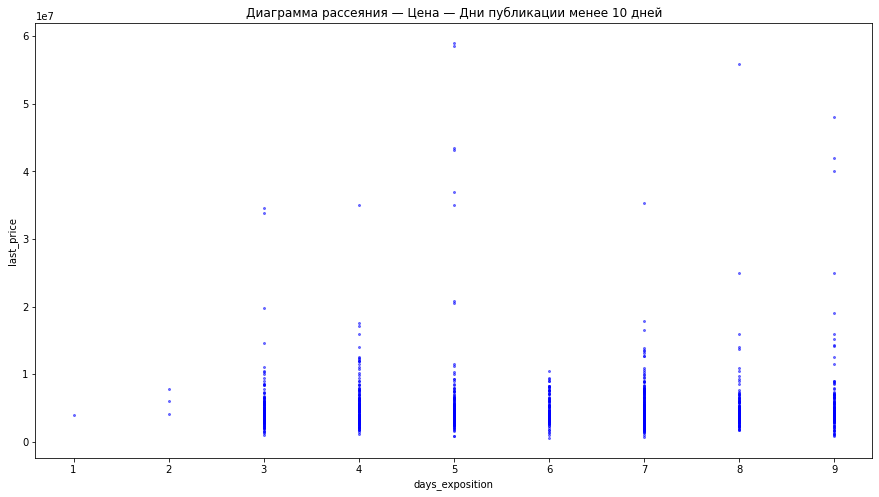

In [50]:
data.query('days_exposition<10').plot(kind='scatter',
        y='last_price' , x='days_exposition', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Цена — Дни публикации менее 10 дней');

Видим единичную публикацию, имеющую всего один день существования, избавимся от него

In [51]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23698 entries, 0 to 23697
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23698 non-null  int64         
 1   last_price            23698 non-null  float64       
 2   total_area            23698 non-null  float64       
 3   first_day_exposition  23698 non-null  datetime64[ns]
 4   rooms                 23698 non-null  int64         
 5   ceiling_height        14503 non-null  float64       
 6   floors_total          23698 non-null  int64         
 7   living_area           23698 non-null  float64       
 8   floor                 23698 non-null  int64         
 9   is_apartment          23698 non-null  bool          
 10  studio                23698 non-null  bool          
 11  open_plan             23698 non-null  bool          
 12  kitchen_area          23698 non-null  float64       
 13  balcony         

In [52]:
data = data.query('days_exposition > 2 or days_exposition.isna()').reset_index(drop=True)

In [53]:
# check
data.shape[0]

23694

**Анализ общей площади, `total_area`**

In [54]:
# Выведем числовое описание параметра
data['total_area'].describe()

count    23694.000000
mean        60.499488
std         35.677681
min         14.400000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

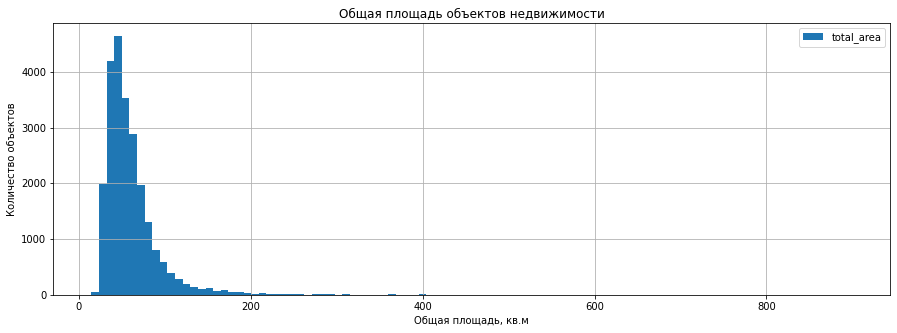

In [55]:
# построим гистограмму
data['total_area'].plot.hist(bins=100, grid=True, legend=True, 
                             title='Общая площадь объектов недвижимости', figsize=(15, 5))
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Количество объектов')
plt.show()

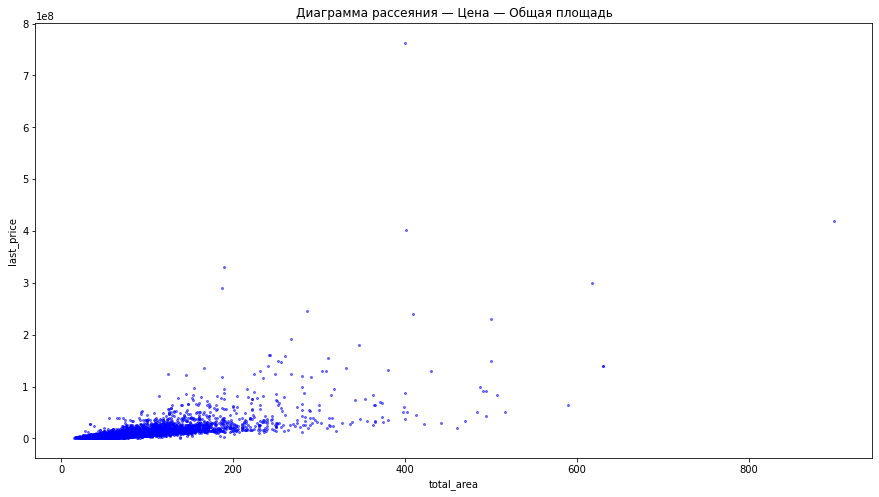

In [56]:
data.query('total_area > 0').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Цена — Общая площадь');

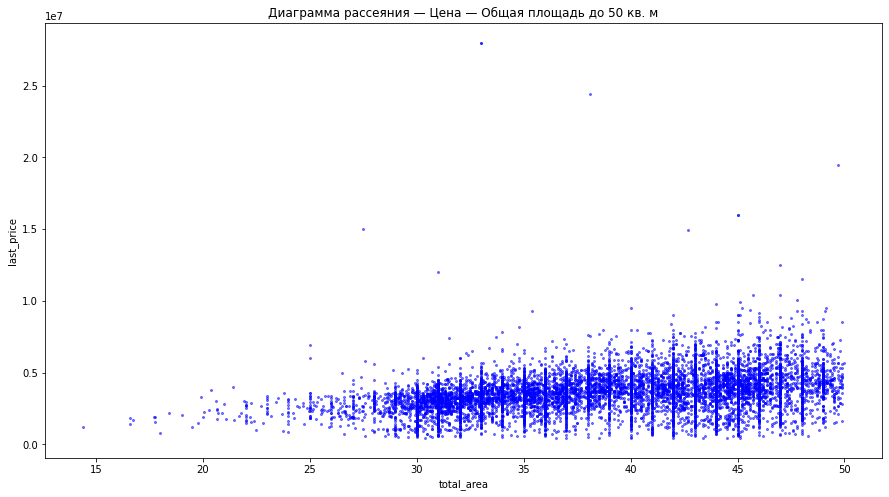

In [57]:
data.query('total_area<50').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Цена — Общая площадь до 50 кв. м');

Удалим объекты меньше 20 и больше 250 кв.м

In [58]:
data = data.query('total_area>20 and total_area<250 or total_area.isna()').reset_index(drop=True)

**Анализ жилой площади, `living_area`**

In [59]:
# Выведем числовое описание параметра
data['living_area'].describe()

count    23563.000000
mean        33.354670
std         18.591563
min          2.000000
25%         18.700000
50%         30.000000
75%         41.970000
max        200.000000
Name: living_area, dtype: float64

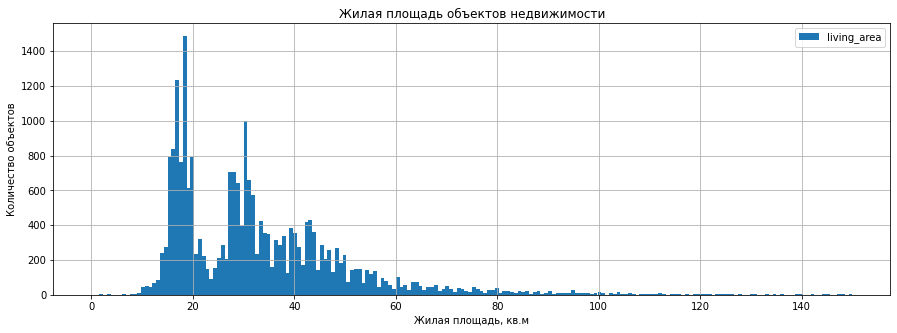

In [60]:
# Гистаграмма жилой площади
data['living_area'].plot.hist(bins=200, grid=True, legend=True, range=(0, 150),
                              title='Жилая площадь объектов недвижимости', figsize=(15, 5))
plt.xlabel('Жилая площадь, кв.м')
plt.ylabel('Количество объектов')
plt.show()

На гистограмме заметны два пика в районе 18 и 30 кв.м, что говорит о самых популярных значениях жилой площади среди объявлений.

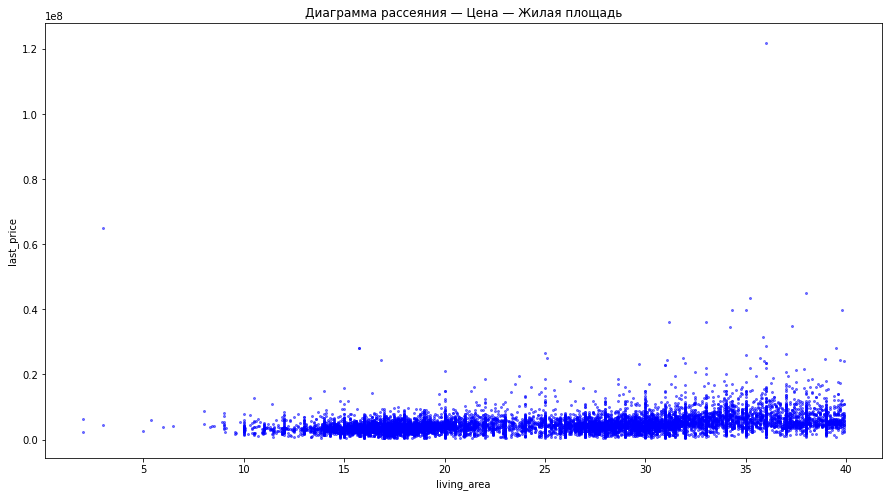

In [61]:
# построим диаграмму
data.query('living_area < 40').plot(kind='scatter',
        y='last_price' , x='living_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Цена — Жилая площадь');

Text(0.5, 1.0, 'Диаграмма рассеяния — Цена — Жилая площадь больше 40 кв.м')

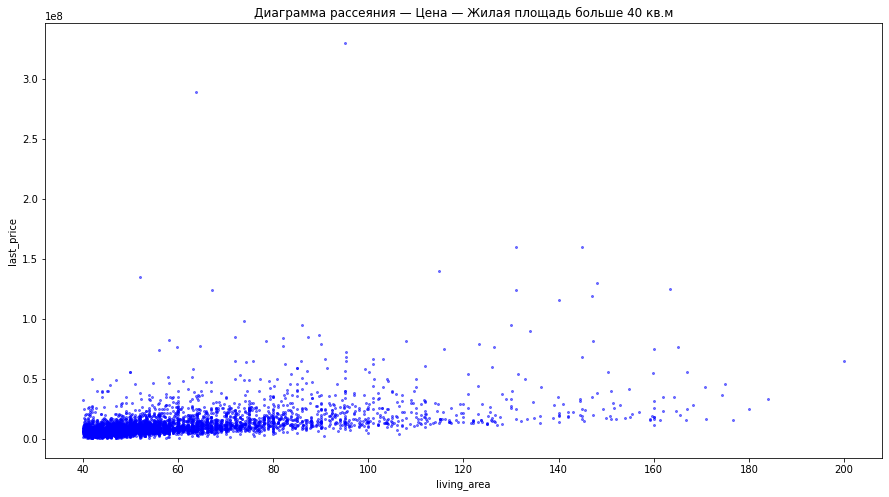

In [62]:
# построим диаграмму
data.query('living_area > 40').plot(kind='scatter',
        y='last_price' , x='living_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Цена — Жилая площадь больше 40 кв.м')

На данном этапе избавимся от величин меньше 10 и более 200 кв.м

In [63]:
data = data.query('living_area>10 and living_area<200 or living_area.isna()').reset_index(drop=True)

**Анализ площади кухни, `kitchen_area`**

In [64]:
# Выведем числовое описание параметра
data['kitchen_area'].describe()

count    23501.000000
mean        10.321488
std          5.281550
min          1.300000
25%          7.300000
50%          9.100000
75%         11.400000
max        107.000000
Name: kitchen_area, dtype: float64

Постороим гистограмму для площади кухни

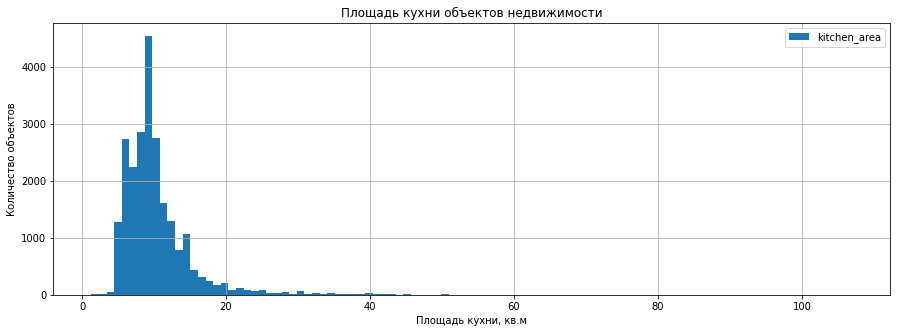

In [65]:
data['kitchen_area'].plot.hist(bins=100, grid=True, legend=True, 
                               title='Площадь кухни объектов недвижимости', figsize=(15, 5))
plt.xlabel('Площадь кухни, кв.м')
plt.ylabel('Количество объектов')
plt.show()

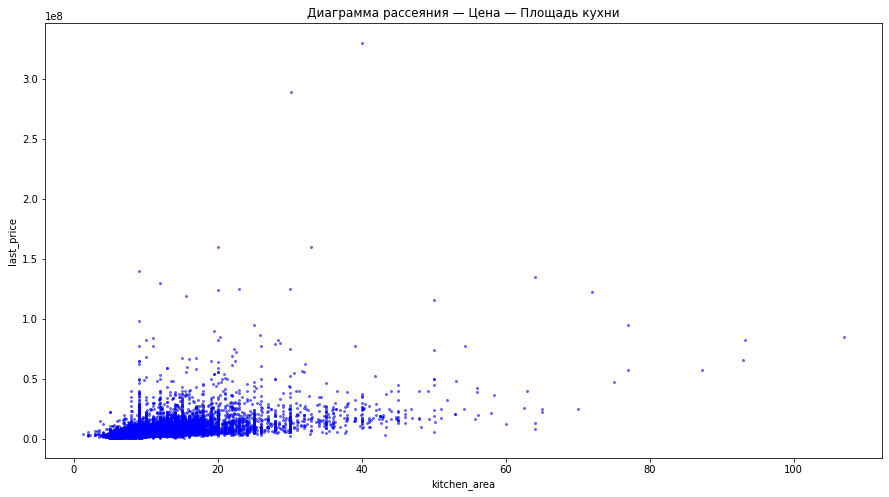

In [66]:
data.query('kitchen_area>0').plot(kind='scatter',
        y='last_price' , x='kitchen_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Цена — Площадь кухни');

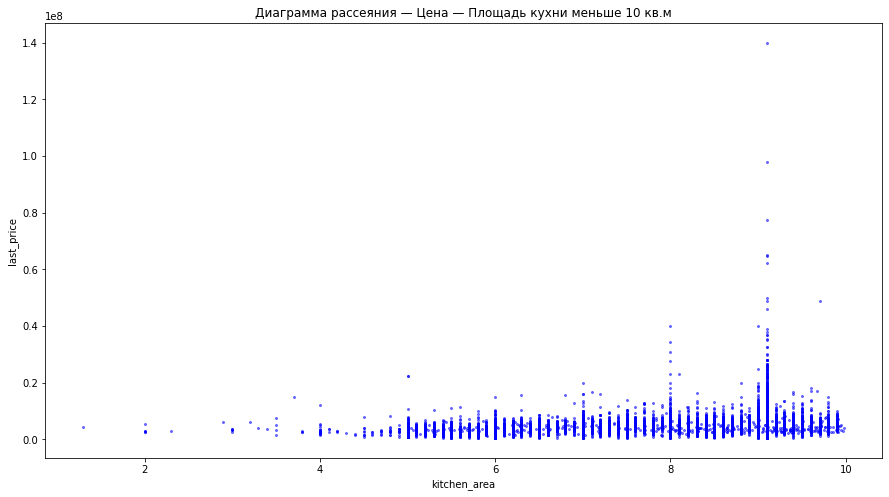

In [67]:
data.query('kitchen_area<10').plot(kind='scatter',
        y='last_price' , x='kitchen_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Цена — Площадь кухни меньше 10 кв.м');

Есть кухни с площадью меньше 4 метров и больше 100, их мы удалим

In [68]:
data = data.query('kitchen_area>=4 and kitchen_area<100 or kitchen_area.isna()').reset_index(drop=True)

In [69]:
data.shape

(23476, 28)

**Анализ цены объекта, `last_price`**

In [70]:
# Выведем числовое описание параметра в млн ден.ед.
(data['last_price']/1000000).describe()

count    23476.000000
mean         6.185297
std          6.954355
min          0.430000
25%          3.400000
50%          4.620000
75%          6.703100
max        330.000000
Name: last_price, dtype: float64

Постороим гистограмму цены объекта

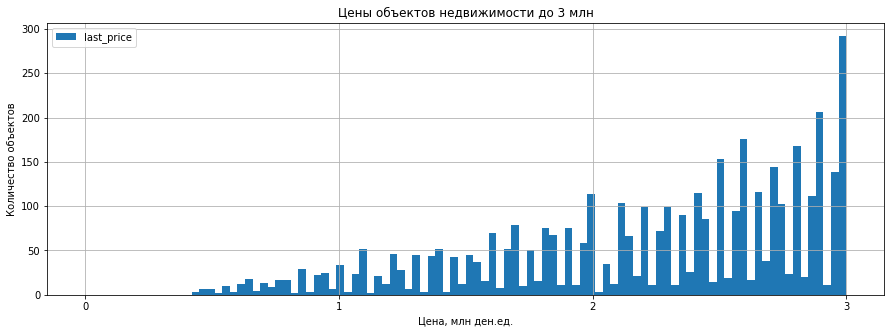

In [71]:
(data['last_price']/1000000).plot.hist(bins=100, grid=True, legend=True, range=(0,3), 
                                       title='Цены объектов недвижимости до 3 млн', figsize=(15, 5))
plt.xlabel('Цена, млн ден.ед.')
plt.ylabel('Количество объектов')
plt.xticks(ticks=range(4))
plt.show()

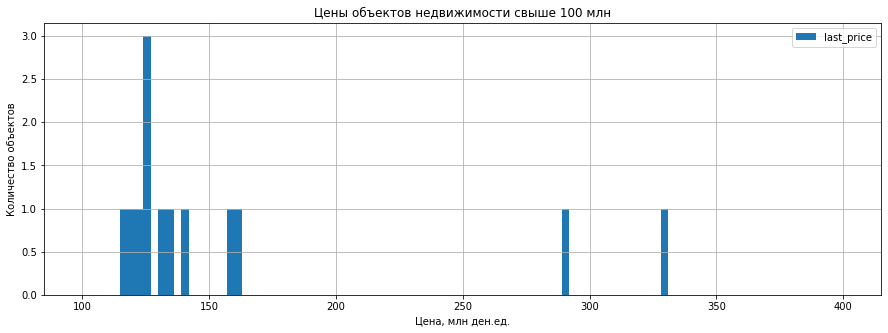

In [72]:
(data['last_price']/1000000).plot.hist(bins=100, grid=True, legend=True, range=(100, 400), 
                                       title='Цены объектов недвижимости свыше 100 млн', figsize=(15, 5))
plt.xlabel('Цена, млн ден.ед.')
plt.ylabel('Количество объектов')
plt.show()

Объекты по стоимости ниже 500000 и выше 150 млн нас не интересуют

In [73]:
data = data.query('last_price>500000 and last_price<150000000 or last_price.isna()').reset_index(drop=True)

**Анализ количества комнат, `rooms`**

In [74]:
# Выведем числовое описание параметра
data['rooms'].describe()

count    23455.000000
mean         2.054573
std          1.026803
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: rooms, dtype: float64

Есть помещения с нулевым количеством комнат. Посчитаем иx количество.

Посчитаем количество студий с 0 значениями в `rooms`

In [75]:
data.query('rooms == 0 and studio == True')['studio'].value_counts()

True    134
Name: studio, dtype: int64

Посчитаем количество объектов со свободной планировкой и с 0 значениями в `rooms`

In [76]:
data.query('rooms == 0 and open_plan == True')['open_plan'].value_counts()

True    58
Name: open_plan, dtype: int64

Есть предположение, что значения комнат равных нулю могли поставить владельцы студий и помещений со свободной планировкой, т.к. сумма этих двух значений даёт количество всех объектов с нулевыми комнатами.

In [77]:
# Заменим значения параметра 'room' с 0 на 1 для всех помещений с количеством комнат 0"

data.loc[data['rooms']==0, 'rooms'] = 1

In [78]:
# Выведем числовое описание параметра
data['rooms'].describe()

count    23455.000000
mean         2.062758
std          1.014301
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: rooms, dtype: float64

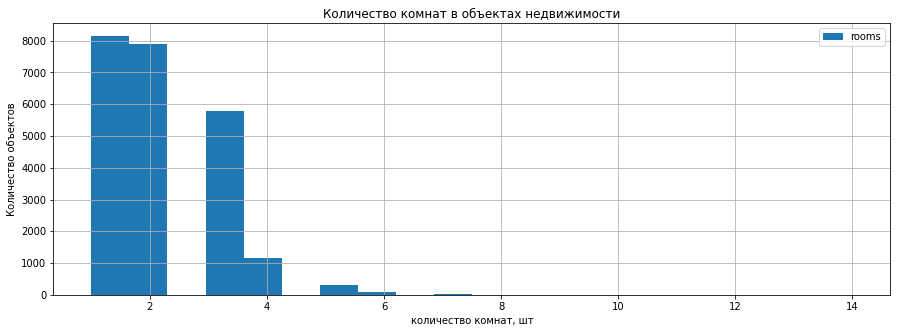

In [79]:
# Постороим гистограмму
data['rooms'].plot.hist(bins=20, grid=True, legend=True, 
                        title='Количество комнат в объектах недвижимости', figsize=(15, 5))
plt.xlabel('количество комнат, шт')
plt.ylabel('Количество объектов')
plt.show()

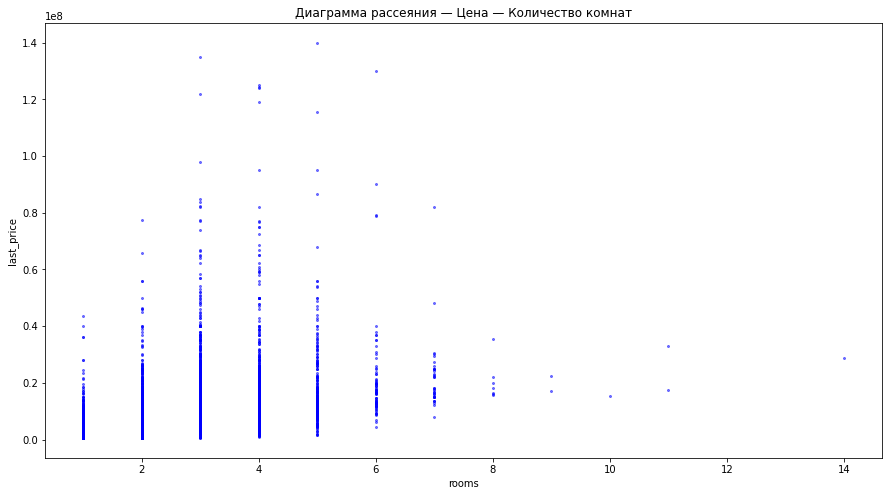

In [80]:
# построим диаграмму
data.query('rooms < 15').plot(kind='scatter',
        y='last_price' , x='rooms', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Цена — Количество комнат');

Избавимся от помещений с комнатами больше 7 штук

In [81]:
data = data.query('rooms < 7 or rooms.isna()').reset_index(drop=True)

**Анализ высоты потолков, `ceiling_height`**

In [82]:
# Выведем числовое описание параметра
data['ceiling_height'].describe()

count    14322.000000
mean         2.722255
std          0.285119
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max          8.300000
Name: ceiling_height, dtype: float64

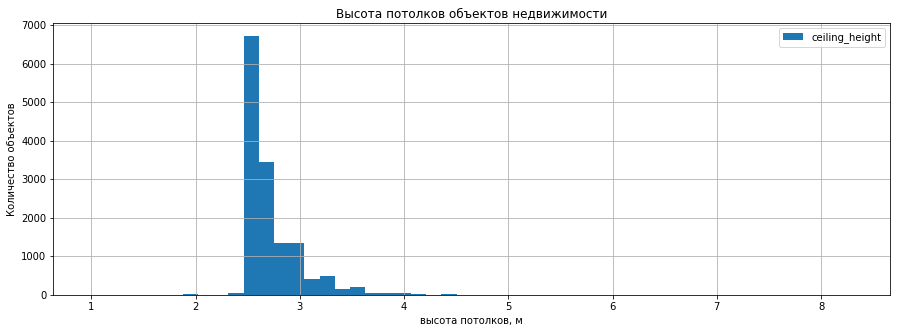

In [83]:
# Постороим гистограмму
data['ceiling_height'].plot.hist(bins=50, grid=True, legend=True, 
                                 title='Высота потолков объектов недвижимости', figsize=(15, 5))
plt.xlabel('высота потолков, м')
plt.ylabel('Количество объектов')
plt.show()

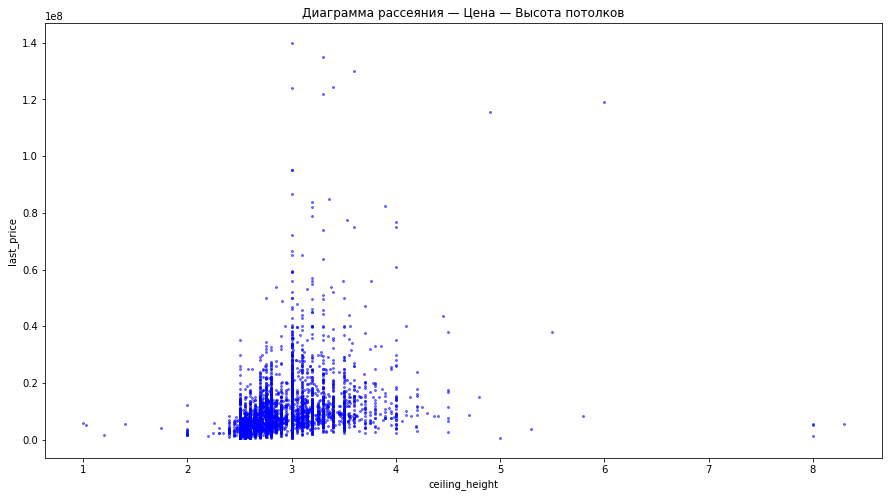

In [84]:
# построим диаграмму
data.query('ceiling_height < 15').plot(kind='scatter',
        y='last_price' , x='ceiling_height', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Цена — Высота потолков');

потолки ниже 2 и более 5 метров редкость, поэтому удалим их из анализа

In [85]:
data = data.query('ceiling_height>2 and ceiling_height<5 or ceiling_height.isna()').reset_index(drop=True)

**Анализ типа этажа квартиры, `floor_type`**

In [86]:
# Выведем числовое описание параметра
data.groupby('floor_type')['weekday'].agg(['count'])

,count
floor_type,
другой,17214
первый,2873
последний,3292


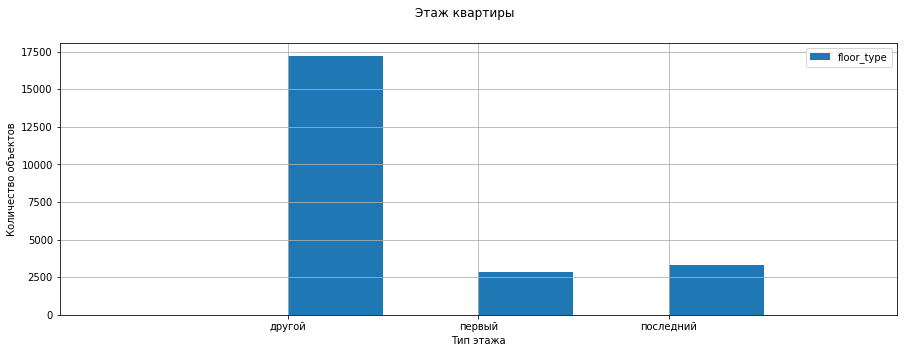

In [87]:
# Постороим гистограмму
data['floor_type'].hist(legend=True, bins=8, range=(-1, 3), figsize=(15, 5))
plt.suptitle("Этаж квартиры")
plt.xlabel('Тип этажа')
plt.ylabel('Количество объектов')
plt.show()

Самым распространенным этажём среди объектов на продажу является этаж не относящийся к первому и последнему. Низкая доля объявлений представлена недвижимостью на первых этажах зданий.

**Анализ общего количества этажей в доме, `floors_total`**

In [88]:
# Выведем числовое описание параметра
data['floors_total'].describe()

count    23379.000000
mean        10.713760
std          6.589443
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Самым высоким зданием в городе является здание Лахта-центра с 87 этажей. На втором месте бизнес-центр 'Лидер Тауэр', у которого 41 этаж. Взглянем на здания с этажами более 35 метров

In [89]:
data.query('floors_total>35').sort_values('floors_total')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,weekday,month_pubplication,year_pubplication,floor_type,citycenter_dist
394,15,5990000.0,54.0,2018-03-22,2,NaN,36,21.4,28,False,...,NaN,3,80.0,11.0,110925.93,3,3,2018,другой,20.0
5727,17,8150000.0,80.0,2019-01-09,2,2.70,36,41.0,13,False,...,NaN,3,80.0,38.0,101875.00,2,1,2019,другой,20.0
10932,16,9200000.0,75.0,2019-02-22,2,2.70,36,40.0,29,False,...,NaN,3,80.0,NaN,122666.67,4,2,2019,другой,20.0
16512,9,3978000.0,40.0,2018-09-24,1,2.65,52,10.5,18,False,...,793.0,0,NaN,45.0,99450.00,0,9,2018,другой,13.0
2216,12,3800000.0,45.5,2018-06-28,2,2.88,60,27.4,4,False,...,342.0,3,614.0,166.0,83516.48,3,6,2018,другой,49.0


Выделяются два объекта с количеством этажей 52 и 60. Цены этих двух объектов говорят, что они вряд-ли находятся в престижных высокоэтажных зданиях. Узнать точное количество этажей не представляется возможным. Заменим эти значения на распространённое среди зданий четвёртого квартиля, т.е. на 25.

In [90]:
# Количество помещений в домах свыше 16
data.query('floors_total>16')['floors_total'].value_counts()

25    1069
17     826
18     501
24     470
23     347
19     338
22     283
20     271
27     161
21     160
26     123
35      24
28      21
36       3
33       1
60       1
34       1
52       1
29       1
Name: floors_total, dtype: int64

здания с 25 этажами - самые распространённые

In [91]:
# Заменим значения этажей на 25
data.loc[data['floors_total'] > 50,'floors_total'] = 25

In [92]:
# Выведем числовое описание параметра
data['floors_total'].describe()

count    23379.000000
mean        10.711108
std          6.577339
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

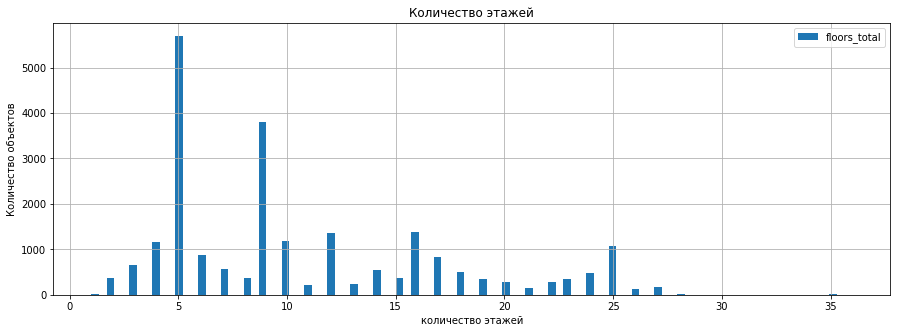

In [93]:
# Постороим гистограмму
data['floors_total'].plot.hist(bins=100, grid=True, legend=True, title='Количество этажей', figsize=(15, 5))
plt.xlabel('количество этажей')
plt.ylabel('Количество объектов') 
plt.show()

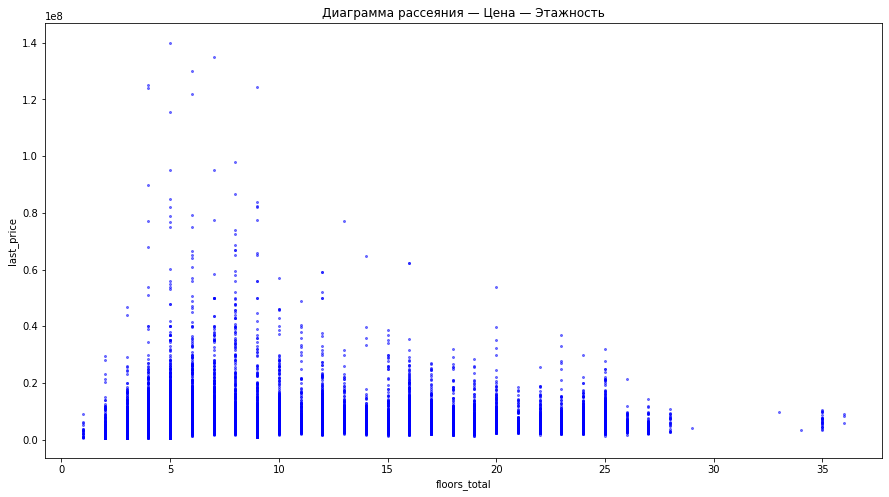

In [94]:
# построим диаграмму
data.query('floors_total>0').plot(kind='scatter',
        y='last_price' , x='floors_total', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Цена — Этажность');

Видим, что много объектов с 35 этажами отдельно распологающихся от общей массы

In [95]:
data.query('floors_total==35')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,weekday,month_pubplication,year_pubplication,floor_type,citycenter_dist
855,14,7777777.0,75.00,2017-11-16,2,NaN,35,40.50,23,False,...,NaN,3,80.0,169.0,103703.69,3,11,2017,другой,20.0
1041,10,5200000.0,64.50,2015-11-06,2,NaN,35,39.00,15,False,...,NaN,3,80.0,281.0,80620.16,4,11,2015,другой,20.0
1886,13,10150000.0,74.00,2017-11-17,2,2.80,35,34.40,30,False,...,NaN,3,80.0,NaN,137162.16,4,11,2017,другой,20.0
2919,9,4300000.0,37.00,2017-08-08,1,NaN,35,14.00,15,False,...,NaN,3,80.0,50.0,116216.22,1,8,2017,другой,20.0
4786,12,5500000.0,50.00,2017-06-22,1,2.80,35,22.00,4,False,...,609.0,3,145.0,537.0,110000.00,3,6,2017,другой,20.0
5669,20,3590000.0,25.00,2017-08-30,1,2.80,35,11.92,26,False,...,NaN,3,80.0,198.0,143600.00,2,8,2017,другой,20.0
5728,12,4590000.0,43.00,2018-10-19,1,NaN,35,14.00,11,False,...,NaN,3,80.0,82.0,106744.19,4,10,2018,другой,20.0
7142,10,4599000.0,42.00,2019-01-10,1,NaN,35,15.00,12,False,...,NaN,3,80.0,72.0,109500.00,3,1,2019,другой,20.0
8381,20,7500000.0,73.30,2017-05-18,3,NaN,35,28.00,27,False,...,NaN,3,80.0,250.0,102319.24,3,5,2017,другой,20.0
9060,7,6500000.0,49.10,2019-04-12,1,2.50,35,31.00,3,False,...,NaN,3,80.0,3.0,132382.89,4,4,2019,другой,20.0


Все эти объекты находятся на расстоянии в 20 км от центра города, имеют одинаковое расстояние до аэропорта 19 км, имеют три пруда в 80 м. Скорее всего это жилой комплекс.

**Анализ расстояния до центра города в метрах, `citycenter_nearest`**

In [96]:
# Выведем числовое описание параметра
data['city_centers_nearest'].describe()

count    17911.000000
mean     14273.320585
std       8600.861256
min        181.000000
25%       9407.000000
50%      13149.000000
75%      16322.500000
max      65968.000000
Name: city_centers_nearest, dtype: float64

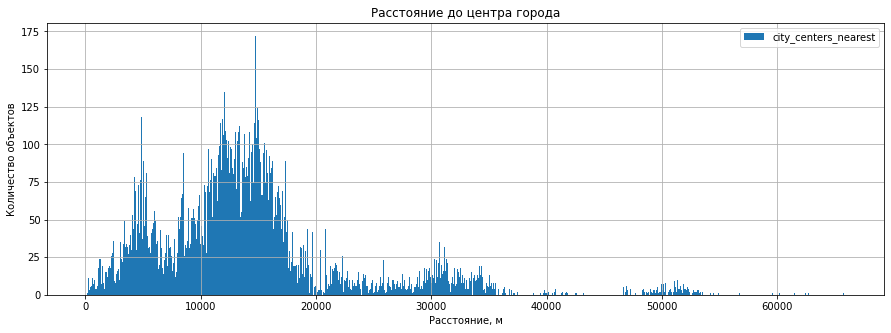

In [97]:
# Постороим гистограмму
data['city_centers_nearest'].plot.hist(bins=1000, range=(0, 66000), grid=True, legend=True, title='Расстояние до центра города', figsize=(15, 5))
plt.xlabel('Расстояние, м')
plt.ylabel('Количество объектов')
plt.show()

небольшое число объектов от 55 км можно убрать

In [98]:
data = data.query('city_centers_nearest<55000 or city_centers_nearest.isna()').reset_index(drop=True)

**Анализ расстояния до ближайшего аэропорта, `airports_nearest`**

In [99]:
# Выведем числовое описание параметра
data['airports_nearest'].describe()

count    17878.000000
mean     28783.829623
std      12614.488142
min          0.000000
25%      18510.000000
50%      26772.000000
75%      37313.000000
max      73827.000000
Name: airports_nearest, dtype: float64

Выведем объекты с минимальным расстоянием до аэропорта

In [100]:
data.query('airports_nearest<10000')['airports_nearest'].sort_values().head()

20795       0.0
12724    6450.0
3957     6450.0
7667     6914.0
22826    6949.0
Name: airports_nearest, dtype: float64

Заменим нулевое значение на минимально приемлемое, т.е. на 6450 м

In [101]:
data.loc[data['airports_nearest'] == 0,'airports_nearest'] = 6450

In [102]:
# Выведем числовое описание параметра
data['airports_nearest'].describe()

count    17878.000000
mean     28784.190402
std      12613.757084
min       6450.000000
25%      18510.000000
50%      26772.000000
75%      37313.000000
max      73827.000000
Name: airports_nearest, dtype: float64

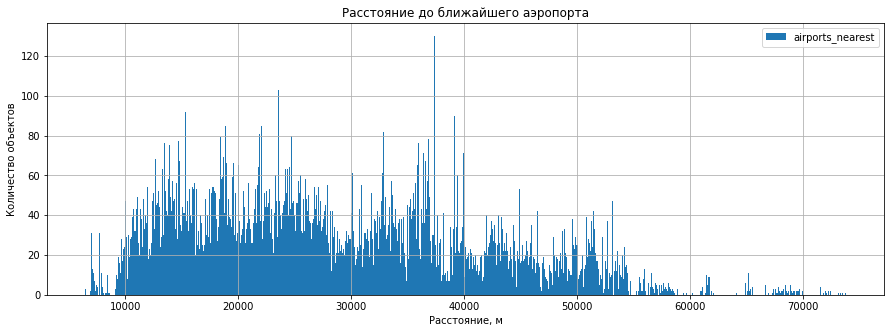

In [103]:
# Постороим гистограмму
data['airports_nearest'].plot.hist(bins=800, grid=True, legend=True, title='Расстояние до ближайшего аэропорта', figsize=(15, 5))
plt.xlabel('Расстояние, м')
plt.ylabel('Количество объектов')
plt.show()

**Анализ этажа квартиры, `floor`**

In [104]:
# Выведем числовое описание параметра
data['floor'].describe()

count    23367.000000
mean         5.901528
std          4.888207
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

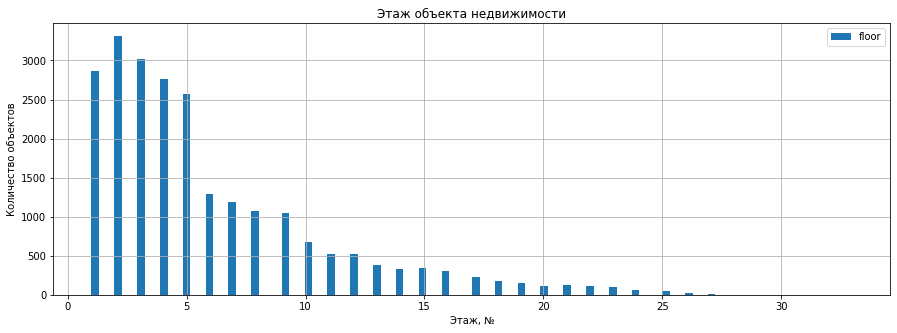

In [105]:
# Постороим гистограмму
data['floor'].plot.hist(bins=100, grid=True, legend=True, title='Этаж объекта недвижимости', figsize=(15, 5))
plt.xlabel('Этаж, №')
plt.ylabel('Количество объектов')
plt.show()

**Анализ дня и месяца публикации, `first_day_exposition`**

In [106]:
# Выведем числовое описание параметра `месяц публикации`
data['month_pubplication'].value_counts()

2     2600
3     2550
4     2348
11    2346
10    2095
9     1957
6     1738
8     1721
7     1657
12    1618
1     1478
5     1259
Name: month_pubplication, dtype: int64

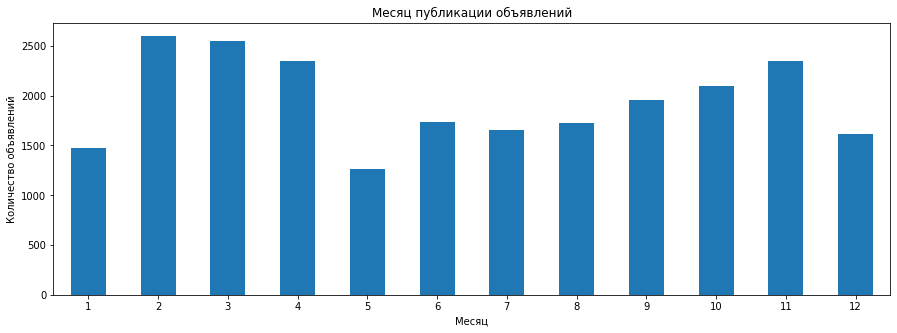

In [107]:
# Постороим график для параметра `месяц публикации`
(
    data.groupby('month_pubplication')['month_pubplication']
    .agg('count')
    .plot(kind='bar', rot=0, title='Месяц публикации объявлений', figsize=(15, 5))
)
plt.xlabel('Месяц')
plt.ylabel('Количество объявлений')
plt.show()

Видим, что самые популярные месяцы для объявлений - февраль, март, апрель. Месяцы с самым низким числом объявлений - декабрь, январь и май. Причин, почему февраль опережает другие месяцы по количеству объявлений может быть несколько, но самой очевидной является восполнение объявлений за январь, которые люди не имели возможность разместить из-за новогодних праздников. Много людей и компаний, которые так или иначе вовлечены в рынок недвижимости не работали и накопившиеся объявления за январь подстегнули высокий уровень размещений в феврале. Ещё одной причиной может являться оплата налога на имущество 1 декабря. После которой многие решают, что финансовая нагрузка для них высокая и решают продать недвижимость.

In [108]:
# Выведем числовое описание параметра `день публикации`
data['weekday'].value_counts()

3    4224
1    4125
4    3961
2    3919
0    3553
5    1914
6    1671
Name: weekday, dtype: int64

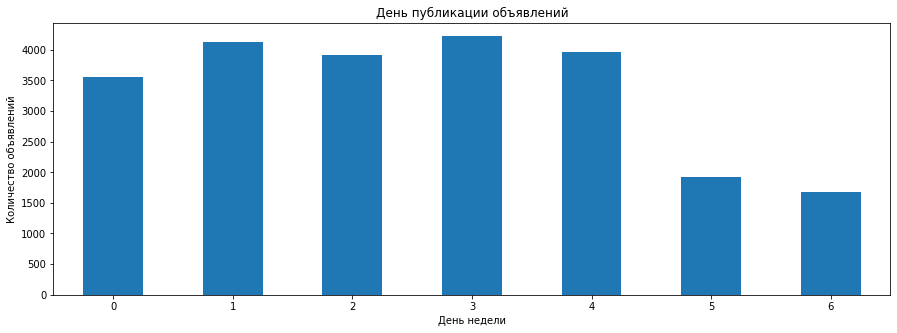

In [109]:
# Постороим грифик для параметра `день публикации`
(
    data.groupby('weekday')['weekday']
    .agg('count')
    .plot(kind='bar', rot=0, title='День публикации объявлений', figsize=(15, 5))
)
plt.xlabel('День недели')
plt.ylabel('Количество объявлений')
plt.show()

Самые популярным днём недели является четверг, самое низкое число объявлений приходится на субботу и воскресенье.

**Анализ расстояния до ближайшего парка, `parks_nearest`**

In [110]:
# Выведем числовое описание параметра
data['parks_nearest'].describe()

count    7909.000000
mean      491.798837
std       342.972628
min         1.000000
25%       288.000000
50%       455.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Посмотрим на данные, где ближайшее расстояние до парка менее 10 метро

In [111]:
data.query('parks_nearest < 10')['parks_nearest'].sort_values().unique()

array([1., 3., 4., 7., 9.])

Даже если парк находится рядом с домом, он всё равно будет находиться на каком-то расстоянии из-за придомовой инфраструктуры. Поэтому низкие значение можно исправить на более приемлемые минимальные 10 метров.

In [112]:
# Исправим аномалии
data.loc[data['parks_nearest'] < 10, 'parks_nearest'] = 10

In [113]:
# Выведем числовое описание параметра
data['parks_nearest'].describe()

count    7909.000000
mean      491.802251
std       342.967799
min        10.000000
25%       288.000000
50%       455.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

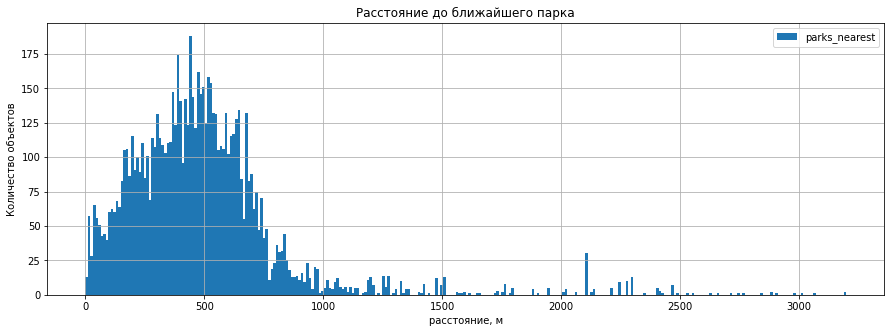

In [114]:
# Постороим гистограмму
data['parks_nearest'].plot.hist(bins=300, range=(0, 3200), grid=True, legend=True, title='Расстояние до ближайшего парка', figsize=(15, 5))
plt.xlabel('расстояние, м')
plt.ylabel('Количество объектов')
plt.show()

**Вывод**
> **В ходе анализа различных параметров недвижимости были получены следующие результаты:**

> Анализ общей площади не выявил аномалий. Средняя общая площадь квартир составляет 54,50 квадратных метров, с минимальным значением в 14 квадратных метров и максимальным значением в 114 квадратных метров.

> Анализ жилой площади показал, что средняя жилая площадь составляет 31,58 квадратных метров, с разбросом значений от 10 до 77 квадратных метров. Медианное значение жилой площади составляет 30 квадратных метров. 
 
> Анализ площади кухни показал, что средняя площадь кухни составляет 9,39 квадратных метров, с разбросом значений от 1,3 до 18,59 квадратных метров.
 
> Анализ цены объекта показал, что средняя цена составляет 4,84 миллиона ден.ед, с минимальной ценой в 430 тысяч ден.ед и максимальной ценой в 11,65 млн ден.ед. 
 
> Анализ количества комнат показал, что большинство квартир имеют 2 комнаты. Минимальное количество - 1, максимальное - 5. Были обнаружены помещения без комнат, со значением нуль. Мы заменили их на значение 1, т.к., скорее всего, это студии и объекты со свободной планировкой.
 
> Анализ высоты потолков показал, что средняя высота потолков составляет 2,67 метра, с разбросом значений от 2,2 до 3.21 метров. 
 
> Анализ типа этажа квартиры показал, что большинство помещений в объявлениях находятся на других этажах кроме первого или последнего. Второе место занимает последний этаж. 

> Анализ этажа квартиры не выявил аномальных значений. Как и следовало ожидать минимальным этажом оказался первый, самым большим - 33. Наиболее распространённым является 4 этаж.

> Анализ общего количества этажей в домах показал, что большинство домов имеют 9 этажей.

> Анализ расстояния до ближайшего аэропорта выявил аномальное значение в 0 м, которое было исправлено на минимально приемлемое значение - 6450 м. Максимальное расстояние составляет 84869 м, средним значением является цифра в 28765 м.

> Анализ расстояния до центра города показал, что среднее расстояние составляет 14238 метров, с разбросом значений от 181 метра до 66 км.

> Анализ расстояния до ближайшего парка позволил определить, что большинство квартир имеющих поблизости парки, имеют его в радиусе 455 метров, с максимальным значением - 3,2 км. Были обнаружены необычно низкие показатели расстояний до парка, они были изменены.

> Анализ месяца публикации. Можно заметить, что февраль, март и апрель являются наиболее востребованными месяцами для размещения объявлений, в то время как декабрь, январь и май характеризуются наименьшим количеством объявлений. 

> Анализ дня публикации. Интересно отметить, что четверг обладает наивысшей популярностью среди дней недели для размещения объявлений, в то время как суббота и воскресенье выделяются наименьшим количеством объявлений, что может быть связано с увеличенной активностью пользователей в будние дни по сравнению с выходными.

In [115]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23367 entries, 0 to 23366
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23367 non-null  int64         
 1   last_price            23367 non-null  float64       
 2   total_area            23367 non-null  float64       
 3   first_day_exposition  23367 non-null  datetime64[ns]
 4   rooms                 23367 non-null  int64         
 5   ceiling_height        14287 non-null  float64       
 6   floors_total          23367 non-null  int64         
 7   living_area           23367 non-null  float64       
 8   floor                 23367 non-null  int64         
 9   is_apartment          23367 non-null  bool          
 10  studio                23367 non-null  bool          
 11  open_plan             23367 non-null  bool          
 12  kitchen_area          23367 non-null  float64       
 13  balcony         

In [116]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,367.00","23,367.00","14,287.00","20,247.00","23,367.00","23,367.00","23,367.00","23,367.00","23,367.00"
min,1.00,20.60,2.20,3.00,"520,000.00",10.08,4.00,1.00,1.00
max,6.00,248.70,4.90,"1,580.00","140,000,000.00",184.00,93.20,33.00,36.00
median,2.00,52.00,2.65,95.00,"4,600,000.00",30.00,9.10,4.00,9.00


In [117]:
# check

try:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [118]:
# check
df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


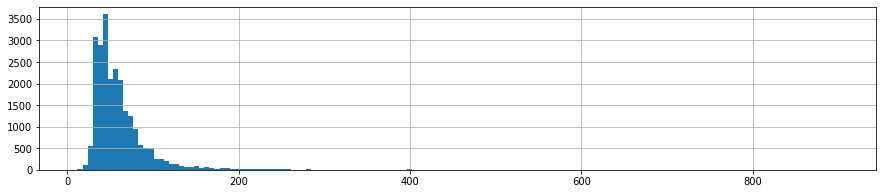

In [119]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3));

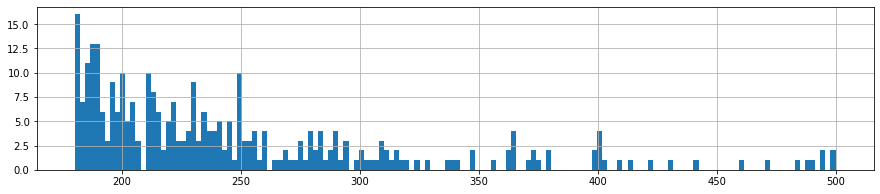

In [120]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

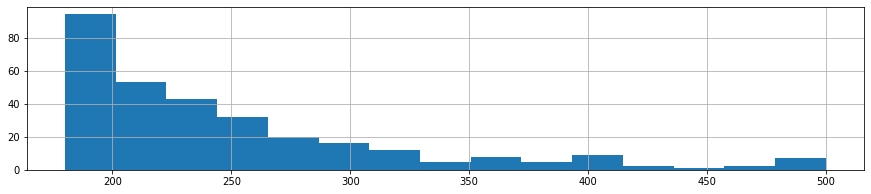

In [121]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

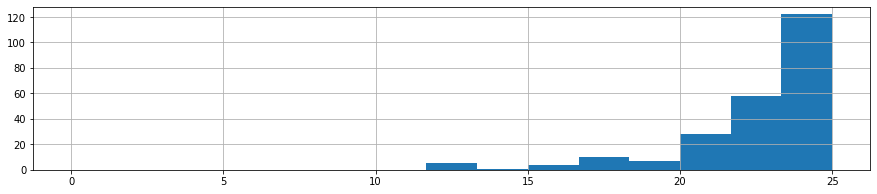

In [122]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [123]:
# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,1.00,23.18,2.40,3.00,"630,000.00",10.93,4.20,1.00,2.00
0.01,1.00,28.00,2.50,4.00,"1,050,000.00",13.18,5.00,1.00,2.00
0.5,2.00,52.00,2.65,95.00,"4,600,000.00",30.00,9.10,4.00,9.00
0.99,5.00,168.60,3.70,"1,066.54","29,866,670.00",99.50,32.00,23.00,26.00
0.9988,6.00,229.92,4.20,"1,371.52","72,223,100.00",149.98,50.97,26.00,32.84


#### Изучим, как быстро продавались квартиры

In [124]:
# Выведем числовое описание параметра `days_exposition`
data['days_exposition'].describe()

count    20247.00000
mean       180.38381
std        219.12955
min          3.00000
25%         45.00000
50%         95.00000
75%        231.00000
max       1580.00000
Name: days_exposition, dtype: float64

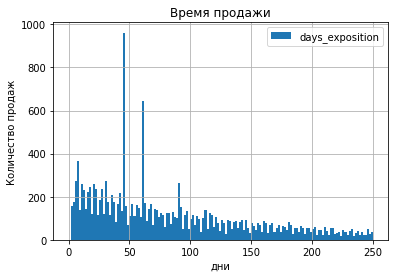

In [125]:
#Построим гистограмму для `days_exposition`
data['days_exposition'].plot.hist(bins=150, range=(0, 250), grid=True, legend=True)
plt.title('Время продажи')
plt.xlabel('дни')
plt.ylabel('Количество продаж')
plt.show()

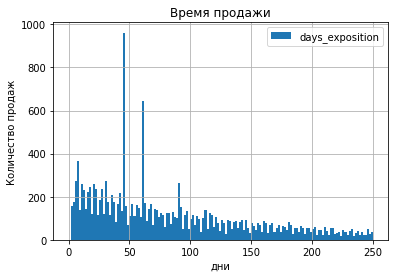

In [126]:
#Построим гистограмму для `days_exposition`
data['days_exposition'].plot.hist(bins=150, range=(0, 250), grid=True, legend=True)
plt.title('Время продажи')
plt.xlabel('дни')
plt.ylabel('Количество продаж')
plt.show()

**Вывод**  
> Среднее время продаж, mean = 180 дней.  
> Медиана времени продаж, median = 95 дней.   
> Быстрыми продажами можно считать те, которые происходят в течение 45 дней (1,5 месяца).  
> Необычно долгими продажами можно считать те, которые происходят после 230 дней (7,5 месяцев).

In [127]:
data.pivot_table(index='year_pubplication', values='days_exposition')

,days_exposition
year_pubplication,
2014,908.913793
2015,647.379091
2016,319.732415
2017,158.508316
2018,94.266711
2019,31.003763


Видим уменьшение с каждым годом времени нахождения объявления от старта до продаж

#### Изучим факторы, которые больше всего влияют на общую стоимость объекта

**Зависимость цены от общей площади**

In [128]:
# построим матрицу парных коэффициентов корреляций
data[['last_price', 'total_area']].corr()

,last_price,total_area
last_price,1.000000,0.722241
total_area,0.722241,1.000000


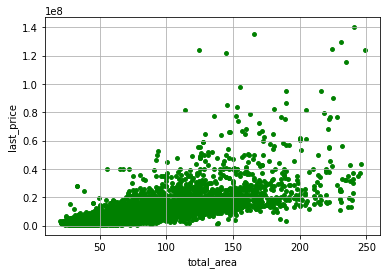

In [129]:
# построим график зависимости цены от общей площади
data.plot(x='total_area', y='last_price', kind='scatter', grid=True, s=15, c='green');

**Зависимость цены от жилой площади**

In [130]:
# построим матрицу парных коэффициентов корреляций
data[['last_price', 'living_area']].corr()

,last_price,living_area
last_price,1.000000,0.620851
living_area,0.620851,1.000000


<AxesSubplot:xlabel='living_area', ylabel='last_price'>

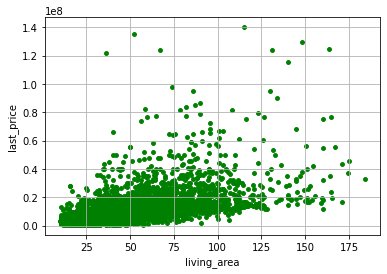

In [131]:
# построим график зависимости цены от жилой площади
data.plot(x='living_area', y='last_price', kind='scatter', grid=True, s=15 , c='green')

**Зависимость цены от площади кухни**

In [132]:
# построим матрицу парных коэффициентов корреляций
data[['last_price', 'kitchen_area']].corr()

,last_price,kitchen_area
last_price,1.000000,0.536328
kitchen_area,0.536328,1.000000


<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

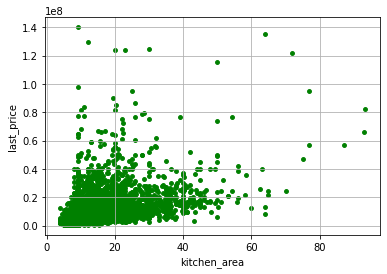

In [133]:
# построим график зависимости цены от площади кухни
data.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True, s=15 , c='green')

**Зависимость цены от количества комнат**

In [134]:
# построим матрицу парных коэффициентов корреляций
data[['last_price', 'rooms']].corr()

,last_price,rooms
last_price,1.000000,0.426042
rooms,0.426042,1.000000


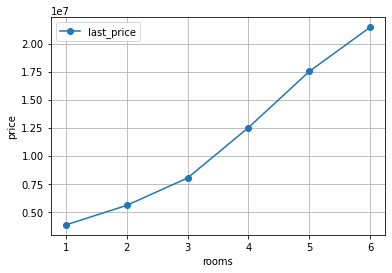

In [135]:
# построим линейный график зависимости цены от количества комнат
(
    data.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-')
)
plt.ylabel("price")
plt.show()

Цена плавно возрастает и достигает максимума в районе 8 комнат. Также, виден всплеск цены помещения с 15 комнатами. Это может говорить, что на цену объекта может влиять какой-то параметр или их может быть несколько.

**Зависимость цены от этажа (первый, последний, другой)**

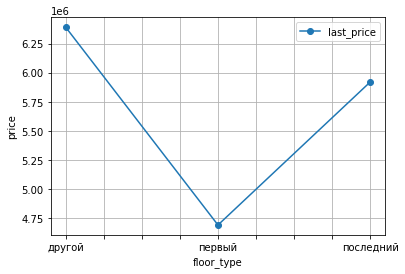

In [136]:
# построим линейный график зависимости цены от этажа
(
    data.pivot_table(index='floor_type', values='last_price')
    .plot(grid=True, style='o-')
)
plt.ylabel("price")
plt.show()

**Зависимость цены от дня размещения**

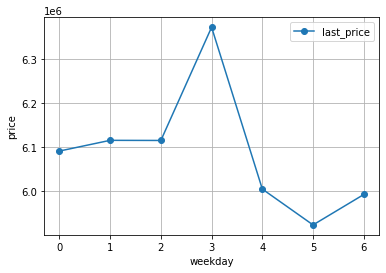

In [137]:
# построим линейный график зависимости цены от дня размещения
(
    data.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-')
)
plt.ylabel("price")
plt.show()

**Зависимость цены от месяца размещения**

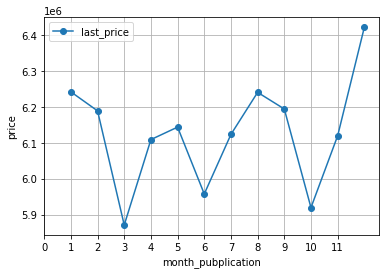

In [138]:
# построим линейный график зависимости цены от месяца размещения
(
    data.pivot_table(index='month_pubplication', values='last_price')
    .plot(grid=True, style='o-')
)
plt.ylabel("price")
plt.xticks(ticks=range(12))
plt.show()

**Зависимость цены от года размещения**

In [139]:
# построим матрицу парных коэффициентов корреляций
data[['last_price', 'year_pubplication']].corr()

,last_price,year_pubplication
last_price,1.000000,-0.054974
year_pubplication,-0.054974,1.000000


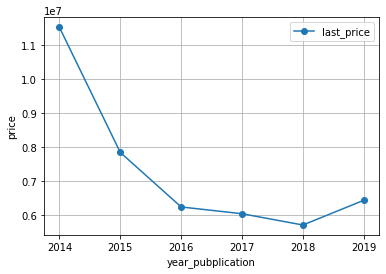

In [140]:
# построим линейный график зависимости цены от года размещения
(
    data.pivot_table(index='year_pubplication', values='last_price')
    .plot(grid=True, style='o-')
)
plt.ylabel("price")
plt.show()

In [141]:
table1 = data.pivot_table(index='year_pubplication', values='last_price')
table2 = data.pivot_table(index='year_pubplication', values='total_area', aggfunc=['mean','count'])
combined_table = pd.concat([table1, table2], axis=1)
combined_table

,last_price,"(mean, total_area)","(count, total_area)"
year_pubplication,,,
2014,1.152043e+07,84.283313,134
2015,7.842898e+06,68.822291,1169
2016,6.239815e+06,60.689002,2751
2017,6.040679e+06,58.880808,8077
2018,5.709158e+06,56.922634,8405
2019,6.436566e+06,57.738539,2831


**Многомерная корреляционная матрица**

In [142]:
#data.corr().style.background_gradient(cmap='coolwarm')
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,weekday,month_pubplication,year_pubplication,citycenter_dist
total_images,1.00,0.13,0.12,0.10,0.04,0.01,0.11,0.03,0.01,-0.03,-0.02,0.10,0.05,-0.00,-0.05,0.03,-0.01,0.01,-0.00,-0.03,0.13,-0.01,0.00,0.14,-0.05
last_price,0.13,1.00,0.72,0.43,0.46,0.02,0.62,0.04,0.04,-0.04,-0.02,0.54,0.02,-0.03,-0.30,0.27,-0.01,0.28,-0.12,0.12,0.77,-0.01,0.00,-0.05,-0.30
total_area,0.12,0.72,1.00,0.78,0.49,-0.06,0.93,-0.02,0.03,-0.08,-0.05,0.56,0.03,-0.03,-0.24,0.20,-0.01,0.21,-0.09,0.17,0.27,-0.01,0.01,-0.09,-0.24
rooms,0.10,0.43,0.78,1.00,0.26,-0.22,0.86,-0.15,-0.01,-0.08,-0.05,0.21,-0.00,-0.06,-0.17,0.14,-0.05,0.11,-0.05,0.12,0.02,-0.00,-0.00,-0.05,-0.17
ceiling_height,0.04,0.46,0.49,0.26,1.00,-0.08,0.43,-0.04,0.06,0.01,0.01,0.39,-0.08,-0.10,-0.36,0.29,-0.05,0.27,-0.14,0.13,0.36,-0.02,0.00,-0.10,-0.36
floors_total,0.01,0.02,-0.06,-0.22,-0.08,1.00,-0.16,0.68,-0.03,0.07,0.05,0.18,0.17,0.11,0.02,-0.16,0.10,-0.05,0.04,-0.05,0.18,0.01,0.02,0.01,0.02
living_area,0.11,0.62,0.93,0.86,0.43,-0.16,1.00,-0.10,0.02,-0.06,-0.04,0.35,0.01,-0.05,-0.23,0.20,-0.05,0.18,-0.07,0.16,0.17,-0.01,0.00,-0.08,-0.23
floor,0.03,0.04,-0.02,-0.15,-0.04,0.68,-0.10,1.00,-0.01,0.04,0.04,0.14,0.17,0.07,0.01,-0.10,0.07,-0.03,0.02,-0.04,0.14,0.01,0.02,0.01,0.01
is_apartment,0.01,0.04,0.03,-0.01,0.06,-0.03,0.02,-0.01,1.00,-0.00,-0.00,0.04,0.03,0.02,0.01,0.02,-0.03,0.02,0.00,0.01,0.05,-0.01,0.00,0.01,0.01
studio,-0.03,-0.04,-0.08,-0.08,0.01,0.07,-0.06,0.04,-0.00,1.00,-0.00,-0.02,0.03,-0.02,-0.00,-0.03,0.01,-0.01,0.00,-0.02,-0.00,-0.00,0.00,0.01,-0.01


**Вывод**  
> Разберёмся во влиянии параметров друг на друга с помощью коэффициента корреляции и графиков. Корреляция, конечно же, не доказывает причинно-следственных связей. Она лишь измеряет степень, направление и силу связи между двумя переменными. Если расположить в порядке убывания значений коэффициентов по степени корреляции, то картина представляется следующей. 

> Наибольшая степень корреляции существует между ценой и общей площадью помещения с коэффициентом 0,72. Это довольно приличное значение. 

> Далее мы видим взаимосвязь цены и размера жилой площади с коэффициентом 0,62. Это тоже хороший результат.

> Зависимость между ценой и площадью кухни составляет 0,53. 

> Зависимость между ценой и количеством комнат составляет 0,42. В свою очередь, на линейном графике зависимости цены от количества комнат видим, что цена повышается с ростом количества комнат. 

> На линейном графике зависимости цены от этажа мы видим, что объекты на первом этаже стоят меньше остальных. Другие этажи имеют самые высокие цены, а помещения на последних этажах - средние цены.

> Разберёмся с датами размещения. С понедельника цены растут до четверга, потом снижаются до минимального уровня в субботу.

> Самые низкие цены в марте, июне, октябре.  Самые высокие: январь, август, декабрь.

> На годовом графике с 2014 года мы видим плавное снижение цен до 2018 года, который стал минимумом. После этого, в течение года цены на недвижимость начали расти и к середине 2019 опередили уровень 2016 года. Также, в таблице зависимости площади от года публикаций мы видим, что средняя площадь квартир в объявлениях снижалась до 2018 года, в то время как количество объявлений сделало резкий подъём за 2014 г, и дальше до 2018 года количество объявлений только росло. За полгода 2019-го рост количества объявлений был незначительным.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [143]:
main_loc = data['locality_name'].value_counts().head(10)
(
    data.query('locality_name in @main_loc.index')
    .groupby('locality_name')['square_price'].agg(['mean','count']).astype('int')
    .sort_values('mean', ascending=False)
)

,mean,count
locality_name,,
Санкт-Петербург,113244,15463
Пушкин,103016,365
Кудрово,94040,470
поселок Парголово,90124,326
Мурино,84414,583
поселок Шушары,78293,438
Колпино,75239,337
Гатчина,68574,307
Всеволожск,68340,397


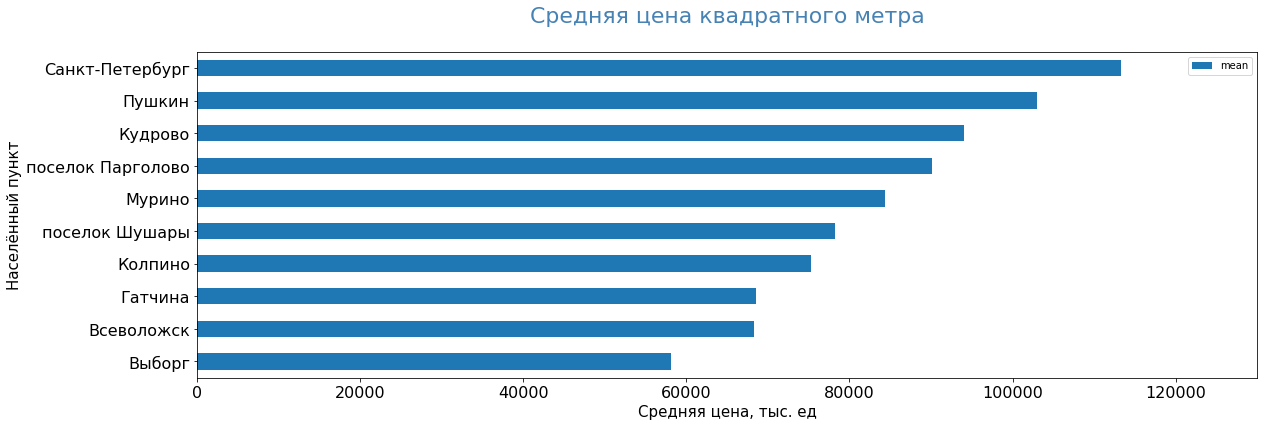

In [144]:
(
    data.query('locality_name in @main_loc.index')
    .groupby('locality_name')['square_price'].agg(['mean'])
    .sort_values('mean', ascending=True)
    .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = True, fontsize = 16)
    .set_title('Средняя цена квадратного метра' + "\n", fontsize = 22, color = 'SteelBlue')
);
plt.xlabel('Средняя цена, тыс. ед', fontsize = 15)
plt.ylabel('Населённый пункт', fontsize = 15)
plt.xlim(0, 130000)
plt.show()


**Вывод**  
> Населённый пункт с самой высокой стоимостью квадратного метра - Санкт-Петербург (**114663** д.ед/кв.м)   
> Населённый пункт с самой низкой стоимостью квадратного метра - Выборг (**58141** д.ед/кв.м)

#### Выясним зависимость стоимости объекта от расстояния до центра города

In [145]:
# Построим сводную таблицу зависимости цены от расстояния до центра
(
    data.query('locality_name =="Санкт-Петербург"')
    .pivot_table(index='citycenter_dist', values='last_price')
    .sort_values('citycenter_dist').astype('int')
)

,last_price
citycenter_dist,
0.0,26381045
1.0,15228028
2.0,15237973
3.0,10227532
4.0,11331319
5.0,12032573
6.0,12644424
7.0,13814028
8.0,9026367


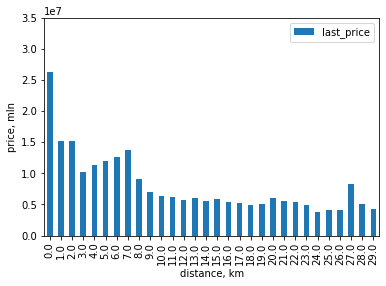

In [146]:
# Построим линейный график зависимости цены от расстояния до центра
(
    data.query('locality_name =="Санкт-Петербург"')
    .pivot_table(index='citycenter_dist', values='last_price')
    .sort_values('citycenter_dist').astype('int')
    .plot(kind='bar', y='last_price', ylim=[0, 35000000], xlim=[0, 35])
)
plt.xlabel('distance, km')
plt.ylabel('price, mln')
plt.show()

**Вывод**  
> График показывает очевидный результат, когда квартиры расположенные ближе к центру стоят дороже. В радиусе от 4 до 7 км от центра заметен всплеск цен, который может быть объяснён влиянием какого-то популярного места или более развитой инфраструктуры.

In [148]:
table1 = data.query('citycenter_dist == 3').pivot_table(index=['citycenter_dist','floor_type'], 
                                               values='balcony', aggfunc='count')
table2 = data.query('citycenter_dist == 5').pivot_table(index=['citycenter_dist','floor_type'], 
                                               values='balcony', aggfunc='count')

In [149]:
pd.concat([table1, table2]).rename(columns={'balcony':'count'})

count
citycenter_dist floor_type       
3.0             другой        207
                первый         54
                последний      74
5.0             другой        667
                первый         78
                последний     132

Изучим записи, которые привели к выбросу на 27-м км. 

In [150]:
data.query('locality_name =="Санкт-Петербург" and citycenter_dist > 26').sort_values('citycenter_dist').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,weekday,month_pubplication,year_pubplication,floor_type,citycenter_dist
736,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,1496.0,0,NaN,128.0,193918.92,1,11,2017,другой,27.0
5871,6,2250000.0,32.0,2018-02-27,1,NaN,2,16.5,2,False,...,NaN,0,NaN,178.0,70312.50,1,2,2018,последний,27.0
799,0,7600000.0,111.0,2017-07-26,3,3.00,16,63.0,12,False,...,185.0,2,72.0,66.0,68468.47,2,7,2017,другой,28.0
1089,0,4072000.0,38.0,2015-10-14,1,NaN,5,16.0,4,False,...,NaN,0,NaN,285.0,107157.89,2,10,2015,другой,28.0
9436,0,3413000.0,43.0,2015-11-10,1,NaN,5,18.0,1,False,...,NaN,0,NaN,258.0,79372.09,1,11,2015,первый,28.0


на 27 км у нас находится объект стоимостью 14,3 млн c аномально высокой ценой, после которого следует ещё один объект с низкой ценой в 2250000. А после уже последнего снова высокая цена в три раза больше предыдущей - 7600000.

## Ⅳ. Общий вывод

В ходе анализа мы выполнили пять основных этапов: изучение данных, предобработка, модификация, анализ данных и общий вывод. На каждом этапе мы использовали различные методы и инструменты для обработки, очистки, и визуализации. Мы также выявили важные закономерности и зависимости в данных.

Всего в датафрейме 23699 строк и 22 колонки. В ходе предобработки были обнаружены и устранены различные проблемы с данными, такие как пропуски, дубликаты, несоответствие типов.  Строки с пропущенными значениями мы старались заполнить  с помощью медианы и других вычислений, где это было возможным. Также исправили неявные дубликаты в названиях населенных пунктов, которые могли быть вызваны человеческими или техническими факторами.

В таблицу были добавлены новые столбцы, включающие следующую информацию: цена за квадратный метр, день недели, месяц и год публикации объявления, тип этажа квартиры и расстояние до центра города в километрах.

На основе анализ мы пришли к следующим выводам:
- Средняя общая площадь помещений составляет 58 квадратных метров, что соответствует среднему размеру квартир в России. Большое число жилищ имеют площадь от 40 до 69 квадратных метров. 
- Средняя жилая площадь составляет 33 квадратных метров. Основная масса объектов недвижимости имеют жилую площадь от 18 до 41 квадратных метров. 
- Средняя площадь кухни составляет 10 квадратных метров. Большинство квартир имеют площадь кухни от 7 до 11 квадратных метров. Самая большая площадь кухни составляет 93 квадратных метров.
- Средняя цена объекта составляет 6,11 млн ден.ед, что соответствует средней цене на рынке недвижимости в России. Основная масса объектов имеют цену от 3,4 до 6,7 млн ден.ед. Самая дорогая квартира стоит 140 миллионов ден.ед.
- Большинство квартир имеют 2 комнаты, что является наиболее востребованным количеством комнат на рынке недвижимости. Минимальное количество комнат - 1, максимальное - 6.
- Средняя высота потолков составляет 2,72 метра, что является стандартной высотой для современных зданий. Подавляющее число потолков имеют высоту от 2,5 до 2,8 метров. Также были выявлены потолки с аномально низким и высоким значением, которые мы исправили на более реалистичные.
- Большинство помещений в объявлениях находятся на других этажах кроме первого или последнего, что может быть связано с тем, что эти этажи имеют свои недостатки, такие как шум, пыль, низкая безопасность или недостаток естественного света. Второе место занимает последний этаж, который может иметь свои преимущества, такие как вид из окна, отсутствие соседей сверху или возможность обустройства мансарды.
- Средним по популярности этажом для квартиры является 6, что означает, что множество квартир находятся в многоэтажных домах. Наиболее распространённым является 4 этаж, который может быть объяснено тем, что он не слишком высок и не слишком низок для жильцов.
- Среднее количество этажей в домах составляет 10, что также подтверждает, что большая часть домов являются многоэтажными. Много домов имеют от 5 до 16 этажей. Также были выявлены дома с аномально большим количеством этажей, которые мы заменили на более вероятные значения.
- Среднее расстояние до ближайшего аэропорта составляет 28784 метров, что означает, что большинство объектов недвижимости находятся в пределах города или его окрестностей и имеют расстояние до аэропорта от 18 до 37 км. Самая близкая квартира находится в 6,45 км от аэропорта, что может быть удобно для частых путешественников.
- Среднее расстояние до центра города составляет 14240 метров, что означает, что многие объекты недвижимости находятся не в самом центре города, а в его пригородах. Большая часть объектов недвижимости имеют расстояние до центра города от 9 до 16 км. Самая удаленная квартира находится в 54 км от центра города, что может быть связано с тем, что она расположена в другом населенном пункте.
- Среднее расстояние до ближайшего парка составляет 491 метров. Это показывает, что объекты проживания имеют рядом зеленую зону для отдыха и прогулок. Значительное большинство же имеют расстояние до парка от 288 до 600 метров. Самая близкая квартира находится в 10 метрах от парка, что может быть приятным бонусом для любителей природы.
- Существует сезонность в публикации объявлений о продаже квартир. Наибольшее количество объявлений появляется в начале весны, когда люди могут быть заинтересованы в смене жилья или инвестициях в недвижимость. Наименьшее количество объявлений наблюдается в конце года и начале нового года, когда люди могут быть заняты другими делами или отдыхать.
- Также есть разница в популярности дней недели для размещения объявлений. Четверг является самым популярным днем, возможно, потому что люди хотят привлечь внимание к своим объявлениям перед выходными. Суббота и воскресенье являются самыми непопулярными днями, возможно, потому что люди предпочитают отдыхать или заниматься личными делами в эти дни.

Среднее время продаж помещений составляет полгода, но это значение сильно зависит от выбросов в данных. Медианное время продаж квартир составляет 95 дней, что лучше отражает типичную ситуацию на рынке недвижимости. Помещения, которые продаются быстрее 45 дней, можно считать быстрыми продажами, которые могут быть связаны с низкой ценой, высоким спросом или другими факторами. Квартиры, которые продаются дольше 230 дней, можно считать необычно долгими продажами, это может быть влиянием с высокой ценой, низким спросом или другими факторами.

Существуют несколько параметров, от которых зависит цена объекта, такие как площадь, количество комнат, этаж, расположение и дата публикации объявления. Наибольшая связь наблюдается между ценой и общей площадью квартиры, что логично, так как чем больше площадь, тем выше цена. Также важным фактором является жилая площадь, которая определяет комфортность проживания. Площадь кухни и количество комнат имеют меньшее влияние на цену, но всё же они отражают функциональность и просторность квартиры. Этаж также влияет на цену, причём первый этаж имеет самую низкую цену, последний этаж - среднюю, а другие - самую высокую. 

Цена квартиры также зависит от даты публикации объявления, которая может отражать сезонность спроса и предложения на рынке недвижимости. Самые высокие цены наблюдаются в январе, августе, декабре, что может быть связано с периодами перед или после праздников и отпусков, когда люди больше склонны к совершению крупных покупок или инвестиций. Самые низкие цены наблюдаются в марте, июне, октябре. Это периоды затишья на рынке недвижимости, когда люди меньше заинтересованы в поиске или продаже квартир. Также есть разница в ценах по дням недели, причём самые высокие цены приходятся на четверг, а самые низкие - на субботу. Это может объяснить тем, что люди хотят привлечь больше внимания к своим объявлениям в середине недели, а в конце недели они заняты другими делами или отдыхом.

На годовом графике с 2014 года мы видим плавное снижение цен до 2018 года, который стал минимумом. После этого, в течение года цены на недвижимость начали расти и к середине 2019 опередили уровень 2016 года. Также, в таблице зависимости площади от года публикаций мы видим, что средняя площадь квартир в объявлениях снижалась до 2018 года, в то время как количество объявлений сделало резкий подъём за 2014 г, и дальше до 2018 года количество объявлений только росло. За полгода 2019-го рост количества объявлений был незначительным.

Анализ данных о рынке недвижимости показывает, что цена квартиры зависит от многих факторов, которые нужно учитывать при покупке или продаже объектов недвижимости. Некоторые факторы, такие как площадь, количество комнат и этаж, являются постоянными и не поддаются изменению. Другие факторы, такие как дата публикации объявления, год публикации объявления и расположение жилища, являются переменными и могут быть использованы для оптимизации цены. Я думаю, что для успешной сделки нужно анализировать данные о рынке недвижимости и выбирать наиболее подходящий момент и место для покупки или продажи квартиры.

**Чек-лист готовности проекта**

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод